In [1]:
g(x) = cos(2cos(x^2)+(1/4)*(x-1)^2)+x/2+1
low=0;high=4;

In [2]:
function make_uv(r)
    δ= (high-low)/(r-1)
    u = low:δ:high
    v = g.(u);
    u,v
end

make_uv (generic function with 1 method)

In [3]:
function make_f(u,v)
    r = length(u)
    σ(x) = max(x,0)
    N0 = 1
    N1 = r-1
    N2 = 1;
    W1 = ones(N1,1)
    b1 = -[u[i] for i in 1:N1];
    s(i) = (i == 0 ? 0 : (v[i+1]-v[i])/(u[i+1]-u[i])) 
    W2 = hcat([s(i) - s(i-1) for i in 1:N1]...)
    b2 = v[1]
    f(x) = (W2*σ.(W1*x + b1) .+ b2)[1,1]
    return f
end

make_f (generic function with 1 method)

In [4]:
f25 = make_f(make_uv(25)...)

(::var"#f#7"{Float64, Matrix{Float64}, Vector{Float64}, Matrix{Float64}, var"#σ#3"}) (generic function with 1 method)

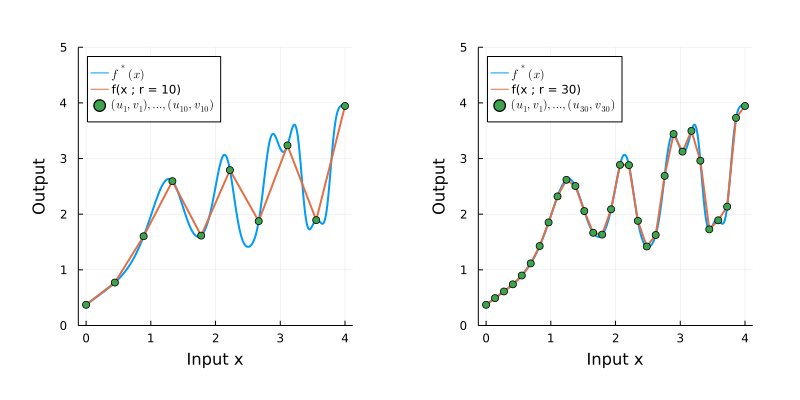

In [8]:
using Plots, Measures, LaTeXStrings
xgrid=low:0.005:high

u,v = make_uv(10)
f25 = make_f(u,v)
p1 = plot(xgrid,g.(xgrid),label=L"f^*(x)",lw=2)
     plot!(xgrid,f25.(xgrid),label="f(x ; r = 10)",lw=2)
     scatter!(u,v,label = L"(u_1,v_1),\ldots,(u_{10},v_{10})")

u,v = make_uv(30)
f50 = make_f(u,v)
p2 = plot(xgrid,g.(xgrid),label=L"f^*(x)",lw=2)
     plot!(xgrid,f50.(xgrid),label="f(x ; r = 30)",lw=2)
     scatter!(u,v,label = L"(u_1,v_1),\ldots,(u_{30},v_{30})")

plot(p1,p2,size=(800,400),
    margin=10mm,
    xlabel="Input x",ylabel="Output",
    legend=:topleft,ylim=(0,5))

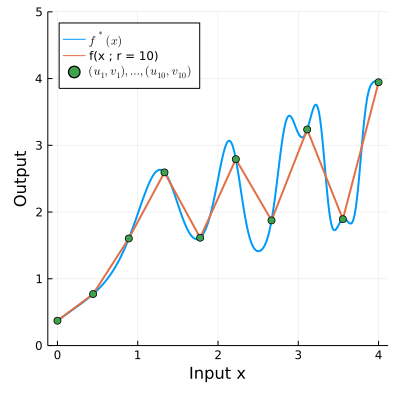

In [9]:
plot(p1,size=(400,400),
    xlabel="Input x",ylabel="Output",
    legend=:topleft,ylim=(0,5))

In [10]:
savefig("relu-approximation_a.pdf")

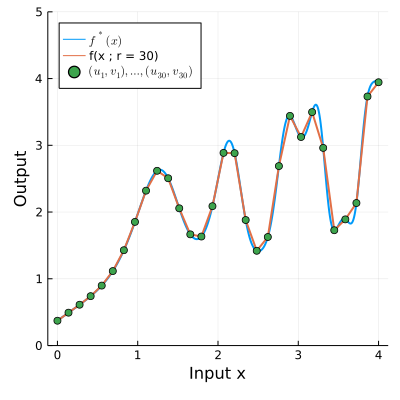

In [11]:
plot(p2,size=(400,400),
    xlabel="Input x",ylabel="Output",
    legend=:topleft,ylim=(0,5))

In [12]:
savefig("relu-approximation_b.pdf")